<a href="https://colab.research.google.com/github/parkmicheal1114/Python_Quest/blob/main/%EB%94%A5%ED%95%9C%EB%81%9D/%EB%94%A5%ED%95%9C%EB%81%9D_10_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [2]:
(train_data , train_labels),(test_data,test_labels) = cifar10.load_data()

x_train , x_val , y_train , y_val = train_test_split(train_data , train_labels , test_size = 0.25 , random_state = 1234 )

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(train_data.shape, train_labels.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(test_data.shape, test_labels.shape))

170498071/170498071 [==============================] - 13s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (37500, 32, 32, 3) 레이블: (37500, 1)
검증 데이터: (12500, 32, 32, 3) 레이블: (12500, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


# 데이터 전처리

In [3]:
# class 정의

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<ipython-input-4-a661f18d5d1f>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


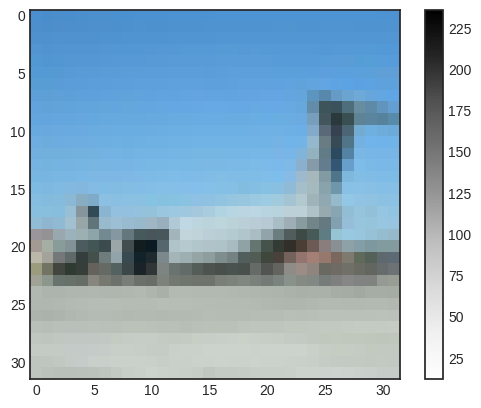

In [4]:
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [5]:
print(x_train.shape)
print(x_val.shape)
print(test_data.shape)

(37500, 32, 32, 3)
(12500, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
# reshape
x_train = x_train.reshape(-1,32*32*3)
x_val = x_val.reshape(-1,32*32*3)
test_data = test_data.reshape(-1,32*32*3)

print(x_train.shape)
print(x_val.shape)
print(test_data.shape)

(37500, 3072)
(12500, 3072)
(10000, 3072)


In [7]:
# 정규화
x_train = x_train / 255.
x_val = x_val / 255.
test_data = test_data / 255.

# 모델 구성

In [8]:
from tensorflow.keras import callbacks
from tensorflow.keras import utils

In [26]:
def cifar_model_making(x , y , x_val , y_val , acivation , opimizer , batch , epoch , drop):

  model = models.Sequential()
  model.add(layers.Input(shape = (3072,)))
  model.add(layers.Dense(2048))
  model.add(layers.BatchNormalization())
  model.add(layers.Activation(acivation))
  model.add(layers.Dropout(drop))
  model.add(layers.Dense(1024))
  model.add(layers.BatchNormalization())
  model.add(layers.Activation(acivation))
  model.add(layers.Dropout(drop))
  model.add(layers.Dense(512))
  model.add(layers.BatchNormalization())
  model.add(layers.Activation(acivation))
  model.add(layers.Dropout(drop))
  model.add(layers.Dense(10, activation='softmax', name='output'))

  model.compile(optimizer=opimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  model.summary()

  check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5',
                                            save_best_only=True)

  early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

  history = model.fit(x, y, epochs = epoch, batch_size = batch,
                      validation_data=(x_val, y_val),
                      callbacks=[check_point_cb, early_stopping_cb])

  return history

In [27]:
# SGD
history = cifar_model_making(x_train , y_train , x_val , y_val , acivation = 'relu' , opimizer = 'SGD' , batch=512 , epoch=60 , drop=0.1)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 2048)              6293504   
                                                                 
 batch_normalization_21 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 activation_21 (Activation)  (None, 2048)              0         
                                                                 
 dropout_21 (Dropout)        (None, 2048)              0         
                                                                 
 dense_22 (Dense)            (None, 1024)              2098176   
                                                                 
 batch_normalization_22 (Bat  (None, 1024)             4096      
 chNormalization)                                     

<ipython-input-28-004580100420>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


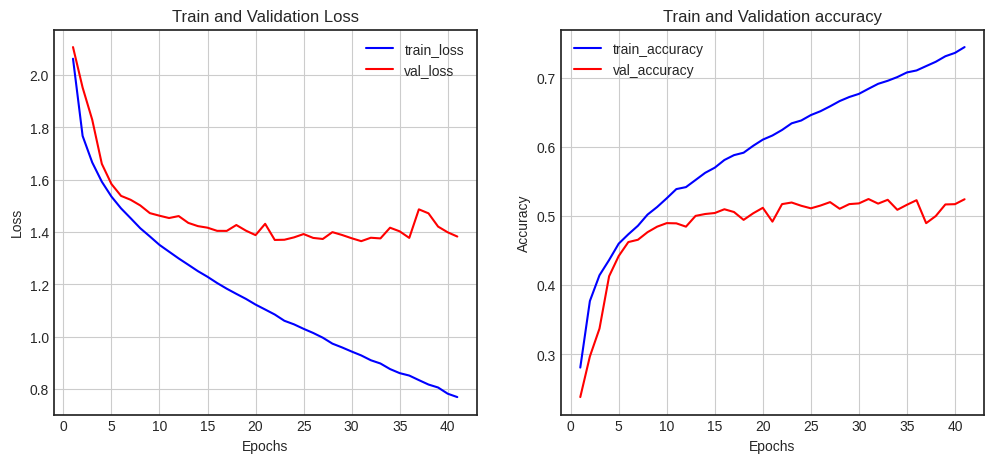

In [28]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [29]:
# Adam
history2 = cifar_model_making(x_train , y_train , x_val , y_val , acivation = 'relu' , opimizer = 'Adam' , batch=512 , epoch=60 , drop=0.1)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 2048)              6293504   
                                                                 
 batch_normalization_24 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 activation_24 (Activation)  (None, 2048)              0         
                                                                 
 dropout_24 (Dropout)        (None, 2048)              0         
                                                                 
 dense_25 (Dense)            (None, 1024)              2098176   
                                                                 
 batch_normalization_25 (Bat  (None, 1024)             4096      
 chNormalization)                                     

<ipython-input-30-a80c24a569f6>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


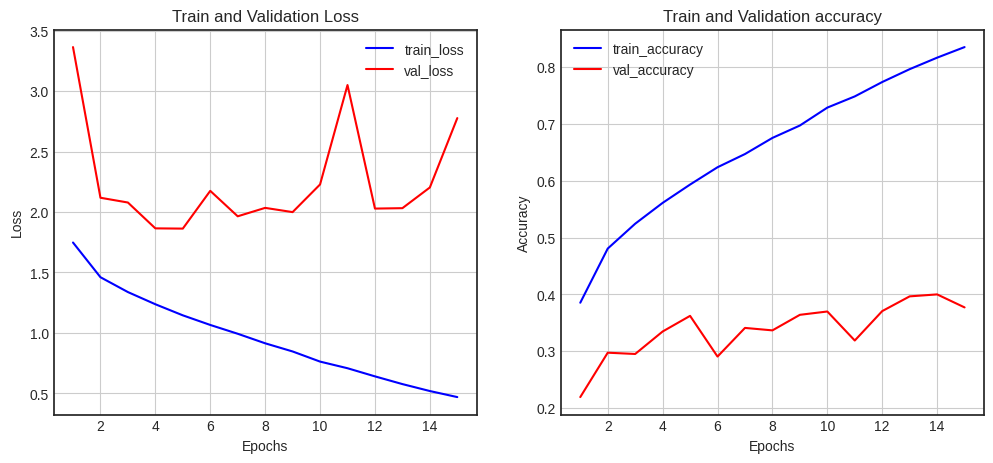

In [30]:
plt.style.use('seaborn-white')

history_dict = history2.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

 - 일반적인 딥러닝 으로는 한계가 뚜렷해 보여서 , 마지막으로 CNN 을 적용하여 성능을 측정 해보고자 한다.

In [31]:
# reshape
x_train = x_train.reshape(-1,32,32,3)
x_val = x_val.reshape(-1,32,32,3)
test_data = test_data.reshape(-1,32,32,3)

print(x_train.shape)
print(x_val.shape)
print(test_data.shape)

(37500, 32, 32, 3)
(12500, 32, 32, 3)
(10000, 32, 32, 3)


In [40]:
def cifar_model_cnn_making(x, y, x_val, y_val, activation, optimizer, batch, epoch, drop):

  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation=activation, input_shape=(32, 32, 3)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(drop))
  model.add(layers.MaxPooling2D(2, 2))

  model.add(layers.Conv2D(256, (3, 3), activation=activation))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(drop))
  model.add(layers.MaxPooling2D(2, 2))

  model.add(layers.Conv2D(256, (3, 3), activation=activation))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(drop))
  model.add(layers.MaxPooling2D(2, 2))

  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation=activation))
  model.add(layers.Dense(10, activation='softmax', name='output'))

  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  model.summary()

  check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5', save_best_only=True)
  early_stopping_cb = callbacks.EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)

  history = model.fit(x, y, epochs=epoch, batch_size=batch,
                      validation_data=(x_val, y_val),
                      callbacks=[check_point_cb, early_stopping_cb])

  return history

In [42]:
history_cnn = cifar_model_cnn_making(x_train , y_train , x_val , y_val , activation = 'relu' , optimizer = 'Adam' , batch=512 , epoch=60 , drop=0.1)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_39 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_39 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 256)       73984     
                                                                 
 batch_normalization_40 (Bat  (None, 13, 13, 256)    

<ipython-input-43-5ddcbc828736>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


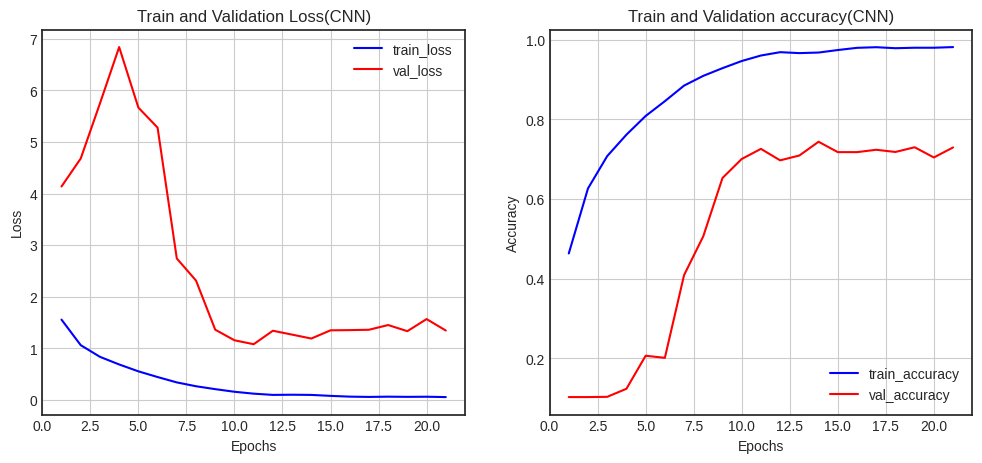

In [43]:
plt.style.use('seaborn-white')

history_dict = history_cnn.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss(CNN)')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation accuracy(CNN)')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

- 불안정해 보이지만 val_accuracy가 기존 모델들 보다 우수해 보여서 이 모델을 가지고 최종 적으로 평가 하려고 한다.

# 예측 및 평가

In [44]:
# 평가.
model_cifar  = models.load_model('cifar10_model.h5')
model_cifar.evaluate(test_data,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.0818 - accuracy: 0.7214


[1.0818383693695068, 0.7214000225067139]

In [46]:
# 예측
import numpy as np
pred  = model_cifar.predict(test_data)
pred_labels = np.argmax(pred , axis = 1)

313/313 [==============================] - 1s 2ms/step


In [45]:
def display_random_image(class_names , images , labels):
  index = np.random.randint(images.shape[0])
  plt.figure()
  plt.imshow(images[index])
  plt.xticks()
  plt.yticks()
  plt.grid()
  plt.title(f'Image #{index}'+ class_names[labels[index]])
  plt.show()


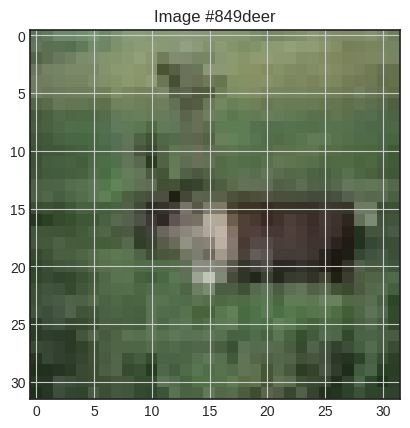

In [47]:
display_random_image(class_names , test_data , pred_labels)

In [49]:
def display_example(class_names , images , labels):
  fig = plt.figure(figsize=(10,10))
  fig.suptitle("Some example of images of the dataset" ,fontsize = 16)
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i], cmap=plt.cm.binary)
      plt.xlabel(class_names[labels[i]])
  plt.show()

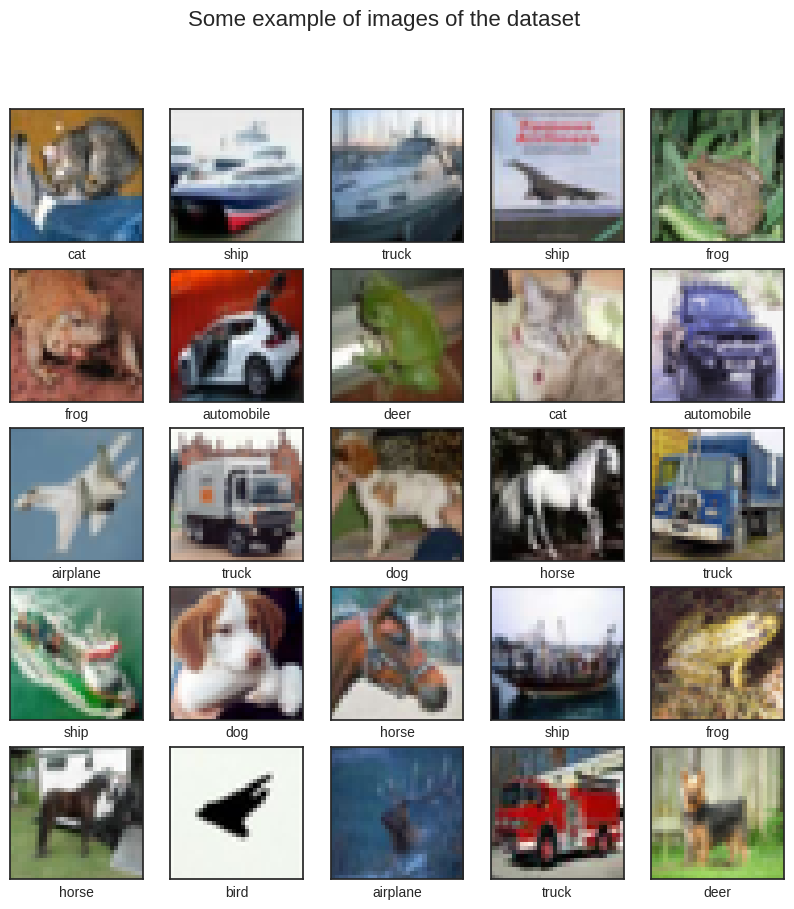

In [51]:
display_example(class_names , test_data , pred_labels)

In [65]:
from sklearn.metrics import classification_report

print(classification_report(test_labels,
                            np.argmax(pred, axis = -1 ),
                            target_names=class_names))


              precision    recall  f1-score   support

    airplane       0.80      0.67      0.73      1000
  automobile       0.88      0.80      0.84      1000
        bird       0.70      0.53      0.60      1000
         cat       0.55      0.59      0.57      1000
        deer       0.64      0.74      0.68      1000
         dog       0.68      0.57      0.62      1000
        frog       0.81      0.79      0.80      1000
       horse       0.74      0.77      0.76      1000
        ship       0.72      0.89      0.80      1000
       truck       0.73      0.86      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



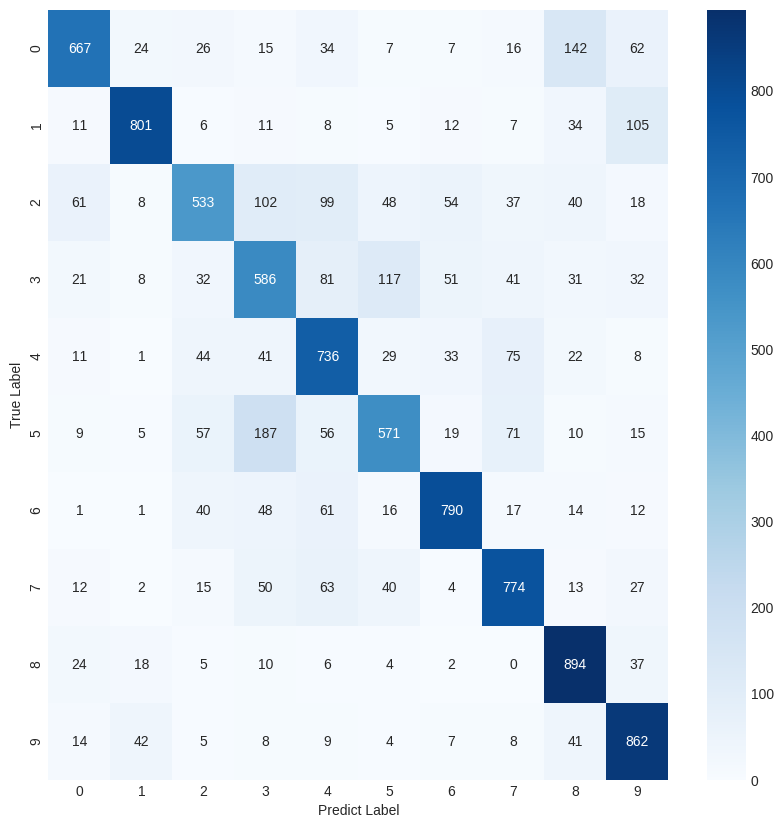

In [67]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (10,10))
cm2 = confusion_matrix(test_labels , np.argmax(pred , axis = -1))
sns.heatmap(cm2 , annot = True , fmt = 'd' , cmap = 'Blues')
plt.xlabel('Predict Label')
plt.ylabel('True Label')
plt.show()

In [72]:
class_names[5] ,class_names[3] , class_names[2]

('dog', 'cat', 'bird')

## 결론..
- 이미지 분류는 CNN이 일반 딥러닝에 비해서 매우 높은 성능을 보였다.

- CNN 모델 걸과 , ('dog', 'cat', 'bird') 순으로 모델 분류가 잘 이뤄 지는 것으로 보인다.